In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import cv2
import os

In [97]:
!ls BCCD/

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [98]:
train_df = pd.read_csv("BCCD/ImageSets/Main/trainval.txt", sep = " ", header=None)
val_df = pd.read_csv("BCCD/ImageSets/Main/test.txt", sep = " ", header=None)

In [99]:
train_df.head()

,0
0,BloodImage_00000
1,BloodImage_00001
2,BloodImage_00002
3,BloodImage_00003
4,BloodImage_00004


In [100]:
val_df.head()

,0
0,BloodImage_00007
1,BloodImage_00011
2,BloodImage_00015
3,BloodImage_00016
4,BloodImage_00018


In [101]:
images_path = os.listdir("BCCD/JPEGImages/")
len(images_path)

364

In [102]:
def show_images():
    plt.figure(figsize=(15,15))
    for i in range(10):
        n = np.random.choice(364, 1)
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        image = plt.imread(os.path.join("BCCD/JPEGImages/", images_path[int(n)]))
        plt.imshow(image)
    plt.show()

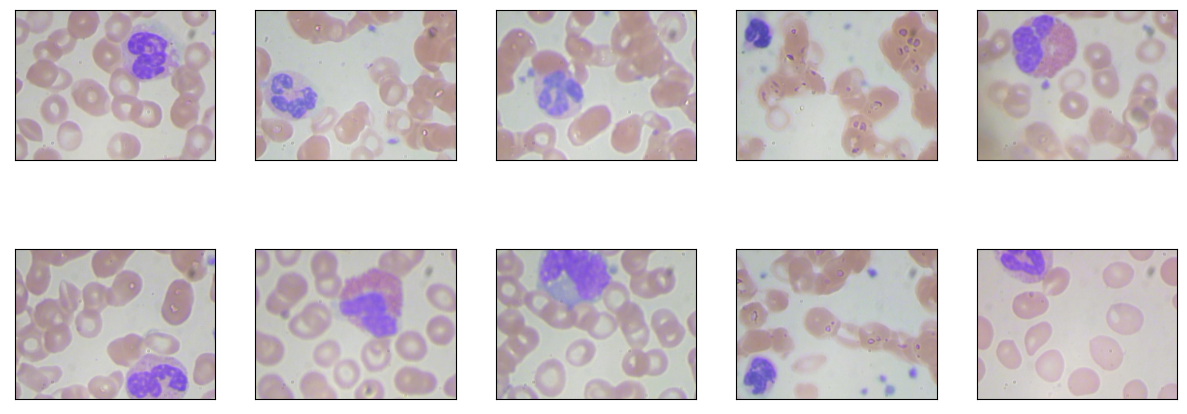

In [103]:
show_images()

In [104]:
# Total number of train and validation images
len(train_df[0].tolist()), len(val_df[0].tolist())

(292, 72)

In [105]:
# Training images & their annotations
for path in train_df[0].tolist():
    image_path = os.path.join("BCCD/JPEGImages/", path + ".jpg")
    annotation_path = os.path.join("BCCD/Annotations/", path + ".xml")
    i_path = os.path.join("images/train", path + ".jpg")
    a_path = os.path.join("images/train", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

In [106]:
# Validation images & their annotations
for path in val_df[0].tolist():
    image_path = os.path.join("BCCD/JPEGImages/", path + ".jpg")
    annotation_path = os.path.join("BCCD/Annotations/", path + ".xml")
    i_path = os.path.join("images/test", path + ".jpg")
    a_path = os.path.join("images/test", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

In [107]:
len(os.listdir("images/train")), len(os.listdir("images/test"))

(584, 144)

In [108]:
# copy the annotation files of the training images
for path in train_df[0].tolist():
    image_path = os.path.join("BCCD/Annotations/", path + ".xml")
    p = os.path.join("images/train", path + ".xml")
    shutil.copy2(image_path, p)

In [109]:
# copy the annotation files of the validation images
for path in val_df[0].tolist():
    path = path.split(".")[0] + ".xml"
    image_path = os.path.join("BCCD/Annotations/", path)
    p = os.path.join("images/test", path + ".xml")
    shutil.copy2(image_path, p)

In [110]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'classes', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    for directory in ['train','test']:
        image_path = os.path.join(os.getcwd(), 'images/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('data/{}.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')


main()

Successfully converted xml to csv.
Successfully converted xml to csv.


In [111]:
train_labels = pd.read_csv("data/train_labels.csv")
test_labels = pd.read_csv("data/test_labels.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_labels.csv'

In [ ]:
print(type(train_labels))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_labels.head()

,filename,width,height,classes,xmin,ymin,xmax,ymax
0,BloodImage_00001.jpg,640,480,WBC,68,315,286,480
1,BloodImage_00001.jpg,640,480,RBC,346,361,446,454
2,BloodImage_00001.jpg,640,480,RBC,53,179,146,299
3,BloodImage_00001.jpg,640,480,RBC,449,400,536,480
4,BloodImage_00001.jpg,640,480,RBC,461,132,548,212


In [ ]:
label = []
for i in train_labels.classes:
      if i == 'WBC':
            label.append(1)
      elif i == 'RBC':
            label.append(2)
      else:
            label.append(3)
train_labels['Label']= label

label = []
for i in test_labels.classes:
      if i == 'WBC':
            label.append(1)
      elif i == 'RBC':
            label.append(2)
      else:
            label.append(3)
test_labels['Label']= label



In [ ]:
train_labels["classes"].value_counts()

RBC          2382
WBC           214
Platelets     209
Name: classes, dtype: int64

In [ ]:
train_labels.head()

,filename,width,height,classes,xmin,ymin,xmax,ymax,Label
0,BloodImage_00001.jpg,640,480,WBC,68,315,286,480,1
1,BloodImage_00001.jpg,640,480,RBC,346,361,446,454,2
2,BloodImage_00001.jpg,640,480,RBC,53,179,146,299,2
3,BloodImage_00001.jpg,640,480,RBC,449,400,536,480,2
4,BloodImage_00001.jpg,640,480,RBC,461,132,548,212,2


In [ ]:
test_labels["classes"].value_counts()

RBC          1936
WBC           174
Platelets     166
Name: classes, dtype: int64

In [ ]:
test_labels.head()

,filename,width,height,classes,xmin,ymin,xmax,ymax,Label
0,BloodImage_00000.jpg,640,480,WBC,260,177,491,376,1
1,BloodImage_00000.jpg,640,480,RBC,78,336,184,435,2
2,BloodImage_00000.jpg,640,480,RBC,63,237,169,336,2
3,BloodImage_00000.jpg,640,480,RBC,214,362,320,461,2
4,BloodImage_00000.jpg,640,480,RBC,414,352,506,445,2


In [ ]:
x,y=[],[]
xmin,xmax,ymin,ymax = [],[],[],[]
data,label = [],[]
index = -1
sum1,sum2,sum3 = 0,0,0
sum1y,sum2y,sum3y = 0,0,0
count1,count2,count3 = 0,0,0


'''TRAIN'''
for i in train_labels.xmin:
      xmin.append(i)
for i in train_labels.xmax:
      xmax.append(i)   
for i in range(len(xmin)):
      xtemp = xmax[i]-xmin[i]
      x.append(xtemp)

for i in train_labels.ymin:
      ymin.append(i)
for i in train_labels.ymax:
      ymax.append(i)   
for i in range(len(ymin)):
      ytemp = ymax[i]-ymin[i]
      y.append(ytemp)

for i in range(len(x)):
      data.append([x[i],y[i]])


for i in train_labels.Label:
      index += 1
      label.append(i)
      if i == 1:
            sum1 += x[index]
            sum1y += y[index]
            count1 += 1
      elif i == 2:
            sum2 += x[index]
            sum2y += y[index]
            count2 += 1
      elif i == 3:
            sum3 += x[index]
            sum3y += y[index]
            count3 += 1

'''for i in range(5):
      print(label[i],x[i])'''

aver1 = sum1/count1
aver2 = sum2/count2
aver3 = sum3/count3
aver4 = sum1y/count1
aver5 = sum2y/count2
aver6 = sum3y/count3
train_data = np.array(data)
train_label = np.array(label)

print('TRAIN AVERAGE X')
print('1','WBC:',aver1)
print('2','RBC:',aver2)
print('3','Platelets:',aver3)

print('\nTRAIN AVERAGE Y')
print('1','WBC:',aver4)
print('2','RBC:',aver5)
print('3','Platelets:',aver6)

'''print(xmin1,xmax1)
print(xmin2,xmax2)
print(xmin3,xmax3)'''


'''TEST'''
x,y=[],[]
xmin,xmax,ymin,ymax = [],[],[],[]
data,label = [],[]
index = -1
sum1,sum2,sum3 = 0,0,0
sum1y,sum2y,sum3y = 0,0,0
count1,count2,count3 = 0,0,0

for i in test_labels.xmin:
      xmin.append(i)
for i in test_labels.xmax:
      xmax.append(i)   
for i in range(len(xmin)):
      xtemp = xmax[i]-xmin[i]
      x.append(xtemp)

for i in test_labels.ymin:
      ymin.append(i)
for i in test_labels.ymax:
      ymax.append(i)   
for i in range(len(ymin)):
      ytemp = ymax[i]-ymin[i]
      y.append(ytemp)

data = []
for i in range(len(x)):
      data.append([x[i],y[i]])

for i in test_labels.Label:
      index += 1
      label.append(i)
      if i == 1:
            sum1 += x[index]
            sum1y += y[index]
            count1 += 1
      elif i == 2:
            sum2 += x[index]
            sum2y += y[index]
            count2 += 1
      elif i == 3:
            sum3 += x[index]
            sum3y += y[index]
            count3 += 1

aver1 = sum1/count1
aver2 = sum2/count2
aver3 = sum3/count3
aver4 = sum1y/count1
aver5 = sum2y/count2
aver6 = sum3y/count3
test_data = np.array(data)  
test_label = np.array(label)  

print('\nTEST AVERAGE X')
print('1','WBC:',aver1)
print('2','RBC:',aver2)
print('3','Platelets:',aver3)

print('\nTEST AVERAGE Y')
print('1','WBC:',aver4)
print('2','RBC:',aver5)
print('3','Platelets:',aver6)



TRAIN AVERAGE X
1 WBC: 192.27570093457945
2 RBC: 104.69227539882452
3 Platelets: 41.34928229665072

TRAIN AVERAGE Y
1 WBC: 174.4018691588785
2 RBC: 100.16750629722922
3 Platelets: 39.698564593301434

TEST AVERAGE X
1 WBC: 201.71264367816093
2 RBC: 103.85537190082644
3 Platelets: 40.91566265060241

TEST AVERAGE Y
1 WBC: 180.24137931034483
2 RBC: 100.62190082644628
3 Platelets: 40.31325301204819


In [ ]:
def Euclidean_dist(point1,point2):
      return np.sqrt(np.square(point2[0]-point1[0])+np.square(point2[1]-point1[1]))

In [ ]:
def update_centroid(classes):
      x,y=0,0
      for points in classes:
            x += points[0]
            y += points[1]
      x = x / len(classes)
      y = y / len(classes)
      new_centroid = [x,y]
      return new_centroid


In [ ]:
# initialize centroids
centroid1 = [192,174]
centroid2 = [104,100]
centroid3 = [41,39]
old_centroids = [centroid1,centroid2,centroid3]
old_centroids = [[round(c[0],2),round(c[1],2)] for c in old_centroids]

def kmeans(data,label,centroids):
      class1,class2,class3 = [],[],[]
      accurate_count = 0
      for i in range(len(data)):
            x = data[i][0]
            y = data[i][1]
            point = [x,y]
            dist1 = Euclidean_dist(centroids[0],point)
            dist2 = Euclidean_dist(centroids[1],point)
            dist3 = Euclidean_dist(centroids[2],point)
            min_dist = min(dist1,dist2,dist3)
            if min_dist == dist1:
                  class1.append(point)
                  centroids[0] = update_centroid(class1)
                  if label[i] == 1:
                        accurate_count += 1
            elif min_dist == dist2:
                  class2.append(point)
                  centroids[1] = update_centroid(class2)
                  if label[i] == 2:
                        accurate_count += 1
            elif min_dist == dist3:
                  class3.append(point)
                  centroids[2] = update_centroid(class3)
                  if label[i] == 3:
                        accurate_count += 1
      accuracy = accurate_count / len(data)
      centroids = [centroids[0],centroids[1],centroids[2]]
      centroids = [[round(c[0],2),round(c[1],2)] for c in centroids]
      return accuracy,centroids

print('K-MEANS')
print('Original Centroids:',old_centroids)
train_accuracy,new_centroids = kmeans(train_data,train_label,old_centroids)
print('Train Accuracy:',train_accuracy)
print('Train Centroids:',new_centroids)
test_accuracy,new_centroids = kmeans(test_data,test_label,new_centroids)
print('Test Accuracy:',test_accuracy)
print('Test Centroids:',new_centroids)



K-MEANS
Original Centroids: [[192, 174], [104, 100], [41, 39]]
Train Accuracy: 0.9775401069518717
Train Centroids: [[209.78, 190.37], [105.45, 100.72], [41.6, 40.42]]
Test Accuracy: 0.9780316344463972
Test Centroids: [[214.11, 190.22], [104.62, 101.47], [44.07, 41.49]]


In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
clf=SVC(kernel='linear',C=1.0,random_state=1).fit(train_data,train_label)
pred=clf.predict(test_data)
score=accuracy_score(test_label,pred)
CVscore=cross_val_score(clf,train_data,train_label,cv=4)
mean=CVscore.mean()
std=CVscore.std()
print('SVM')
print('Accuracy',score)
print('Cross Validation',CVscore)
print('Cross Validation Mean',mean)
print('Cross Validation Std',std)

SVM
Accuracy 0.9859402460456942
Cross Validation [0.96011396 0.98858773 0.99286733 0.98858773]
Cross Validation Mean 0.9825391890299164
Cross Validation Std 0.01306456253196723


In [ ]:
python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record

SyntaxError: invalid syntax (<ipython-input-23-c2c5b2006d61>, line 1)

In [ ]:
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python3 generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=data/train.record

  # Create test data:
  python3 generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=data/test.record
"""
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
FLAGS = flags.FLAGS


# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == 'RBC':
        return 1
    if row_label == 'WBC':
        return 2
    if row_label == 'Platelets':
        return 3
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    path = os.path.join(os.getcwd(), 'images/test')
    print(path)
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), FLAGS.output_path)
    print(path)
    print('Successfully created the TFRecords: {}'.format(output_path))


if __name__ == '__main__':

    tf.app.run()

NotFoundError: Failed to create a NewWriteableFile:  : The system cannot find the path specified.
; No such process

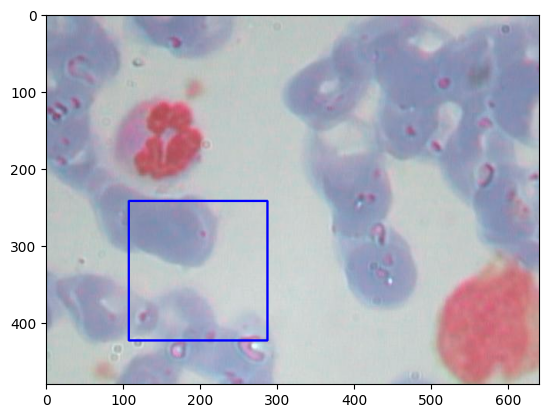

In [ ]:
image_1 = cv2.imread('images/train/BloodImage_00043.jpg')
image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)
cv2.rectangle(image_1, (107, 242), (287, 423), (255,0,0), 2)
cv2.imwrite('rectangle.png', image_1)

image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()